In [3]:
import pandas as pd
import numpy as np
from ggplot import *

In [41]:
LB66 = pd.read_csv('sub.csv')['price_doc']
LB031199 = pd.read_csv('xgb_0.95label.csv')['price_doc']
LB031340 = pd.read_csv('Submission_xgb2.csv')['price_doc']
LBBest = pd.read_csv('0.70.3TwoBestBaseModelTogether.csv')['price_doc']

In [42]:
full_sq = pd.read_csv('test_c.csv')['full_sq']
test_id = pd.read_csv('test_c.csv')['id']

In [24]:
test = pd.read_csv('test_c.csv')
train = pd.read_csv('train_c.csv')

## Compare Singular Data Points

In [47]:
Comparison = pd.DataFrame({'id':test_id,'full_sq':full_sq,'Benchmark':LB66,'Pred':LBBest,'Gap':LB66-LBBest})

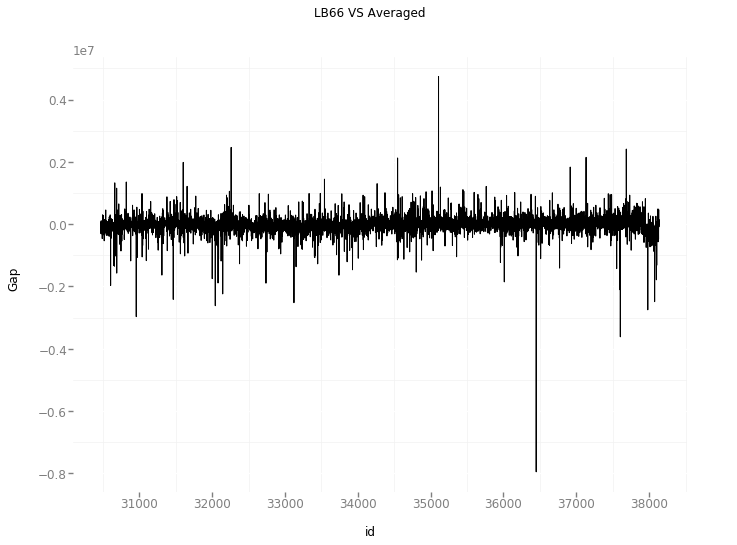

<ggplot: (-9223363308106884913)>


In [48]:
g = ggplot(Comparison,aes(x='id',y='Gap')) + geom_line()+theme_bw() + ggtitle('LB66 VS Averaged')
print(g)

In [12]:
print(min(Comparison['Gap']))

-7951689.6


In [66]:
Comparison2 = pd.DataFrame({'id':test_id,'full_sq':full_sq,'Benchmark':LB66,'Pred':New_sub,'Gap':LB66-New_sub})

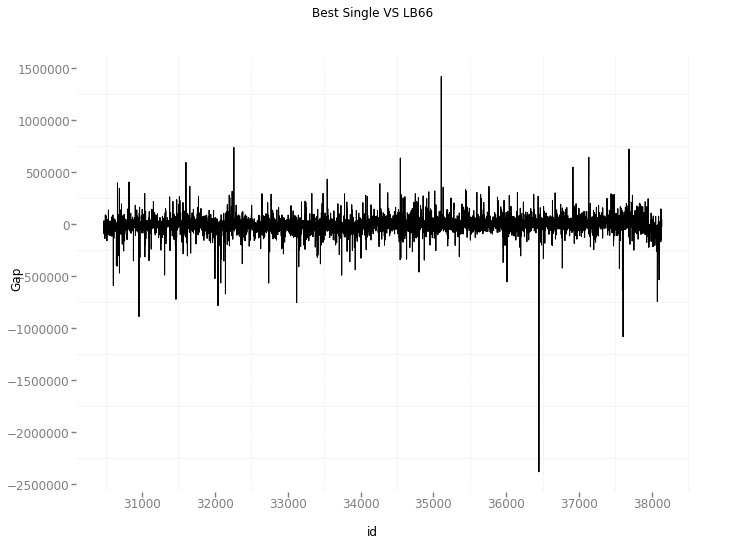

<ggplot: (8728747972665)>


In [67]:
g = ggplot(Comparison2,aes(x='id',y='Gap')) + geom_line()+theme_bw() + ggtitle('Best Single VS LB66')
print(g)

In [13]:
print(min(Comparison2['Gap']))

-7669146.0


## Compare Price Per Sqrt meter

In [50]:
Comparison = pd.DataFrame({'id':test_id,'full_sq':full_sq,'Benchmark':LB66,'Pred':LBBest,'Gap_sqrt':(LB66-LBBest)/full_sq})

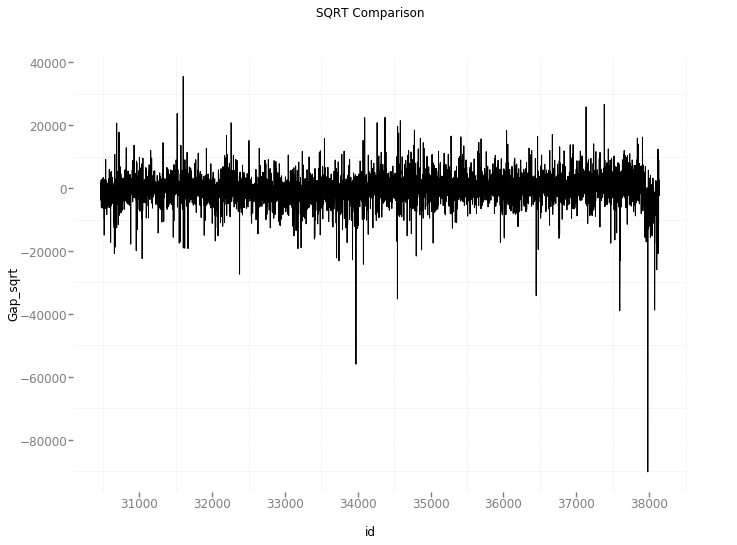

<ggplot: (8728747967422)>


In [51]:
g = ggplot(Comparison,aes(x='id',y='Gap_sqrt')) + geom_line()+theme_bw() + ggtitle('SQRT Comparison')
print(g)

In [60]:
Comparison = Comparison.sort_values(by='Gap_sqrt',ascending=[1])

In [61]:
Comparison

,Benchmark,Gap_sqrt,Pred,full_sq,id
7507,6207215.50,-90186.370492,8957899.80,30.50,37981
3500,4402469.00,-55944.680000,4961915.80,10.00,33974
7122,11031451.00,-38951.988889,13134858.40,54.00,37596
7601,12006361.00,-38755.352025,14494454.60,64.20,38075
4070,5010837.00,-35248.184615,6156403.00,32.50,34544
5975,7981008.00,-34171.420713,15932697.60,232.70,36449
1902,7344046.50,-27362.531183,8616404.20,46.50,32376
7630,11215071.00,-25961.122047,12533896.00,50.80,38104
3603,5868299.00,-24208.457101,6686544.85,33.80,34077
3267,13928128.00,-23106.733427,15566395.40,70.90,33741


In [59]:
test.iloc[5975,:]

id                                             36449
timestamp                                 2016-03-09
full_sq                                        232.7
life_sq                                        232.7
floor                                              3
max_floor                                          3
material                                           1
build_year                                       NaN
num_room                                           1
kitch_sq                                           1
state                                            NaN
product_type                                       1
sub_area                                         133
area_m                                   7.30741e+06
raion_popul                                    75377
green_zone_part                            0.0654443
indust_part                              7.81528e-05
children_preschool                              4237
preschool_quota                               

In [45]:
LBBest[464] = LB66[464]

In [46]:
LBBest[5383] = LB66[5383]
LBBest[5191] = LB66[5191]
LBBest[6350] = LB66[6350]

In [62]:
LBBest[7507] = LB66[7507]
LBBest[3500] = LB66[3500]

In [68]:
sub = pd.DataFrame({'id':test_id,'price_doc':New_sub})
sub.to_csv('WeightedAverageWithLB66.csv',index=False)

In [64]:
New_sub = 0.7*LB66 + 0.3*LBBest

In [65]:
New_sub

0       5.303170e+06
1       8.005750e+06
2       5.285789e+06
3       5.649380e+06
4       4.869905e+06
5       9.111656e+06
6       4.139261e+06
7       4.142314e+06
8       4.628240e+06
9       4.627764e+06
10      6.284501e+06
11      4.839065e+06
12      3.558719e+06
13      3.754303e+06
14      5.930115e+06
15      6.055353e+06
16      2.209694e+07
17      1.942567e+07
18      5.642930e+06
19      1.332658e+07
20      6.546549e+06
21      1.035595e+07
22      8.524119e+06
23      8.286735e+06
24      4.470976e+06
25      7.897798e+06
26      1.085978e+07
27      6.735934e+06
28      3.059031e+06
29      6.540209e+06
            ...     
7632    6.197304e+06
7633    3.063247e+06
7634    1.108110e+07
7635    5.291241e+06
7636    4.235592e+06
7637    4.774276e+06
7638    3.487423e+06
7639    7.183763e+06
7640    7.934824e+06
7641    3.475316e+06
7642    6.716395e+06
7643    5.840639e+06
7644    6.590836e+06
7645    3.425916e+06
7646    6.349124e+06
7647    4.917731e+06
7648    6.937